In [2]:
!pip install http://download.pytorch.org/whl/cu92/torch-0.4.1-cp36-cp36m-linux_x86_64.whl
!pip install torchvision
!pip install Pillow==4.0.0
!pip install image
import torch 
import torch.nn as nn
from torch.autograd import Variable
from torchvision import models,transforms,utils
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.optim import SGD
import copy


    100% |████████████████████████████████| 512.6MB 51.1MB/s 
tcmalloc: large alloc 1073750016 bytes == 0x58dfc000 @  0x7f2acc7aa2a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.9MB/s 
    100% |████████████████████████████████| 2.0MB 13.0MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
  [PIL]
You must restart the runtime in order to use newly installed versions.
    100% |████████████████████████████████| 5.6MB 7.5MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.4.1
    Uninstalling Pillow-5.4.1:
      Successfully uninstalled Pillow-5.4.1
  

In [0]:
def open_image(path):
    img=Image.open(path)
    plt.imshow(img)
    return img

normalise=transforms.Normalize(
    mean=[0.485,0.456,0.406],
    std=[0.229,0.224,0.225]
)

process=transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    normalise
])

def orig_im(image):
    reverse_mean = [-0.485, -0.456, -0.406]
    reverse_std = [1/0.229, 1/0.224, 1/0.225]
    recreated_im = copy.copy(image.data.cpu().numpy()[0])
    for c in range(3):
        recreated_im[c] /= reverse_std[c]
        recreated_im[c] -= reverse_mean[c]
    recreated_im[recreated_im > 1] = 1
    recreated_im[recreated_im < 0] = 0
    recreated_im = np.round(recreated_im * 255)

    recreated_im = np.uint8(recreated_im).transpose(1, 2, 0)
    return recreated_im

 

In [9]:
mdl=models.vgg16(pretrained=True)
print(mdl)
mdl.cuda()
ftrs=mdl.features

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (17): Conv2d

In [0]:
def Deep_dreamer(image,layern,iteration,lr1):
    input = Variable(process(image).unsqueeze(0).cuda(), requires_grad=True)
    mdl.zero_grad()
    for i in range(iteration):
        x=input
        for index,layer in enumerate(ftrs):
            x=layer(x)
            if(index==layern):
                break
        loss=x.norm()
        loss.backward()
        input.data = input.data + lr1 * input.grad.data
    im1 = orig_im(input)
    plt.imshow(im1)


In [11]:
!git clone https://github.com/magus96/PyDream.git

fatal: destination path 'PyDream' already exists and is not an empty directory.


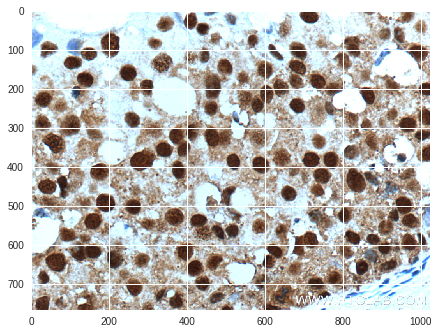

In [39]:
imgg=open_image("/content/PyDream/malig.jpg")

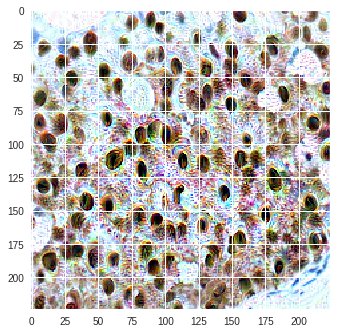

In [40]:
Deep_dreamer(imgg,28,50,0.001)